<h1 style="text-align: center;">Olympic Athlete Data Analysis (1896–2016)</h1>

<h2 style="text-align: center;">(Descriptive Statistics)</h2>

<h2 style="text-align: center;">Table of Contents</h2>

1. **Step 0 – Set up environment**  
   Import libraries (pandas, matplotlib, seaborn) and configure plot aesthetics.

2. **Step 1 – Load and inspect dataset**  
   Preview data, check datatypes, summary statistics.

3. **Step 2 – Handle missing values**  
   Identify nulls, decide whether to drop, fill, or keep for analysis.

4. **Step 3 – Remove duplicates**  
   Check for and remove duplicate rows carefully.

5. **Step 4 – Explore demographics**  
   4a. Age distribution – histogram, outliers, trends  
   4b. Gender distribution – counts, trends over decades  
   4c. Height & Weight – distributions, outliers, sport-specific patterns

6. **Step 5 – Medal analysis**  
   Overall medal counts, top countries by medals, Summer vs Winter comparison.

7. **Step 6 – Participation trends over time**  
   Number of athletes per year, growth patterns, dips due to wars/boycotts.

8. **Step 7 – Sport-specific insights**  
   Top sports by athlete count, distribution patterns, deeper analysis possibilities.

9. **Step 8 – Athlete Physique vs Success in Sports**  
   Patterns, anomalies, correlations with success, temporal trends.


## Step 0 – Set up environment

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for prettier plots
sns.set(style="whitegrid")


We imported pandas for data handling, matplotlib and seaborn for visualization. Setting the style makes plots cleaner.

## Step 1 – Load and inspect dataset

In [4]:
df = pd.read_csv("athlete_events.csv")
df.head()  

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Understand the dataset’s shape, types of data, and missing values. This helps plan cleaning and analysis.

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df.describe(include='all') 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


## Step 2 – Check and Handle Missing Values

In [9]:
import pandasql as ps

# Make sure df is in the local namespace
# Use the locals() dictionary to pass it explicitly

query = """
SELECT 
    SUM(CASE WHEN Age IS NULL THEN 1 ELSE 0 END) AS Missing_Age,
    SUM(CASE WHEN Height IS NULL THEN 1 ELSE 0 END) AS Missing_Height,
    SUM(CASE WHEN Weight IS NULL THEN 1 ELSE 0 END) AS Missing_Weight,
    SUM(CASE WHEN Medal IS NULL THEN 1 ELSE 0 END) AS Missing_Medal
FROM df
"""

# Pass locals() so pandasql knows about the 'df' DataFrame
missing_summary = ps.sqldf(query, locals())
missing_summary


,Missing_Age,Missing_Height,Missing_Weight,Missing_Medal
0,9474,60171,62875,231333


We first identified missing values in key columns (Age, Height, Weight, Medal) using SQL. This step is important because missing data can bias statistics or visualizations, and knowing their count helps us decide how to handle them appropriately.

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)


For numeric columns, we observed 9,474 missing values in Age, 60,171 in Height, and 62,875 in Weight. These were filled with the median to prepare the data for analysis, as the median is less affected by extreme values than the mean. The Medal column had 231,333 missing values, which we kept as-is because nulls are meaningful, indicating that the athlete did not win a medal. This approach ensures that the dataset is ready for descriptive statistics while preserving the integrity of meaningful missing data.

In [11]:
import pandasql as ps

# Make sure df is in the local namespace
# Use the locals() dictionary to pass it explicitly

query = """
SELECT 
    SUM(CASE WHEN Age IS NULL THEN 1 ELSE 0 END) AS Missing_Age,
    SUM(CASE WHEN Height IS NULL THEN 1 ELSE 0 END) AS Missing_Height,
    SUM(CASE WHEN Weight IS NULL THEN 1 ELSE 0 END) AS Missing_Weight,
    SUM(CASE WHEN Medal IS NULL THEN 1 ELSE 0 END) AS Missing_Medal
FROM df
"""

# Pass locals() so pandasql knows about the 'df' DataFrame
missing_summary = ps.sqldf(query, locals())
missing_summary


,Missing_Age,Missing_Height,Missing_Weight,Missing_Medal
0,0,0,0,231333


## Step 3 – Remove Duplicates

In [12]:
# Check for duplicate rows
df.duplicated().sum()

# Remove duplicate rows
df = df.drop_duplicates()


We checked for duplicate rows and removed them to prevent inflated counts or distorted visualizations. It is important to ensure that duplicates reflect actual repeated entries and not legitimate multiple-event participation by the same athlete. By carefully dropping only true duplicates, we maintain data integrity while preparing the dataset for accurate analysis.

## Step 4 – Demographics Analysis

### 4a. Age Distribution

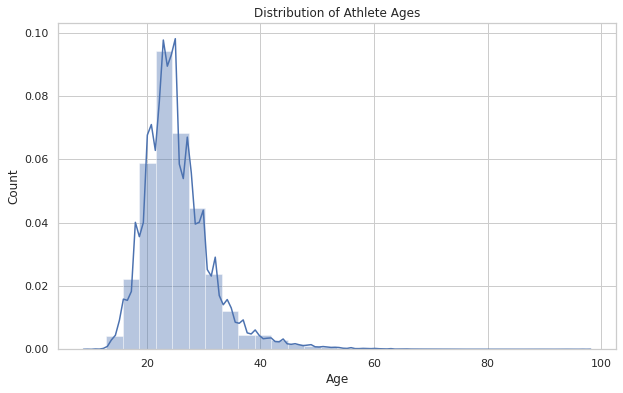

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.distplot(df['Age'].dropna(), bins=30, kde=True)  # Works in older Seaborn
plt.title("Distribution of Athlete Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



We analyzed the distribution of athlete ages to understand peak performance periods and sport-specific trends. Most athletes are concentrated between 20 and 30 years old, indicating the typical peak performance age, while participation above 60 is almost negligible. This analysis helps assess our hypothesis that older athletes may perform better in certain sports and younger athletes excel in others. Observing this distribution provides clear insights into demographic patterns and informs further sport-specific analysis.

### 4b. Gender Distribution

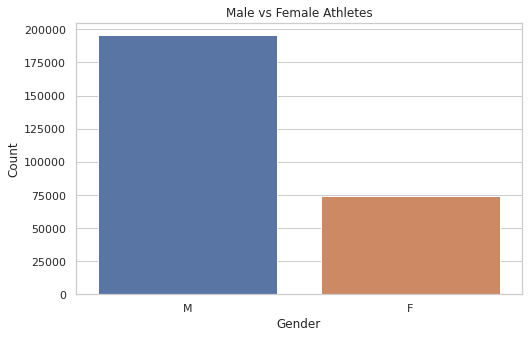

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df)
plt.title("Male vs Female Athletes")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


We analyzed gender distribution to understand participation trends. This helps assess our hypothesis that female athlete participation has steadily increased over the decades. Observing the overall male vs female counts provides insights into historical gender representation, while further analysis (e.g., Year vs Sex count) can reveal changes in participation over time.

### 4c. Height & Weight

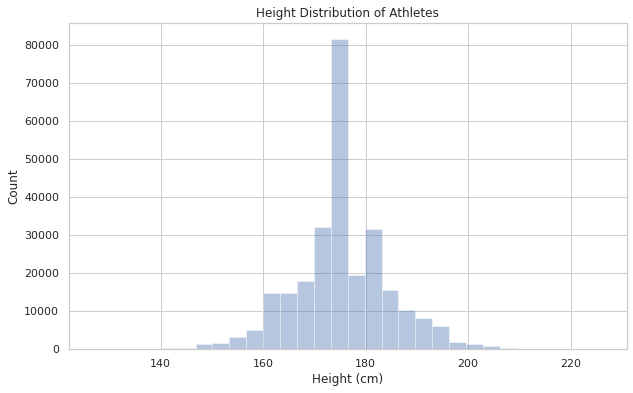

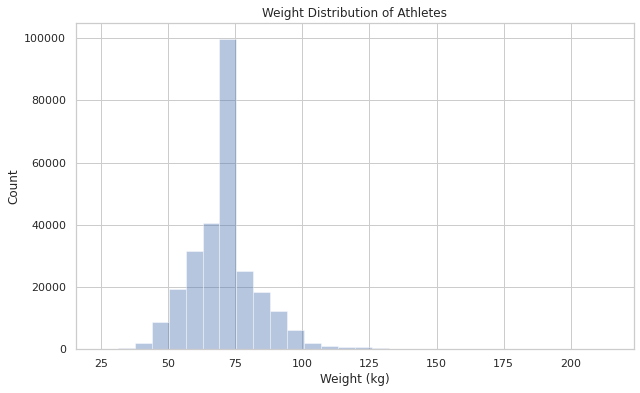

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['Height'].dropna(), bins=30, kde=False)
plt.title("Height Distribution of Athletes")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(df['Weight'].dropna(), bins=30, kde=False)
plt.title("Weight Distribution of Athletes")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()


We analyzed the distributions of Height and Weight to explore how body physique may relate to sport success. Taller and heavier athletes tend to excel in sports like basketball or weightlifting, while lighter athletes often perform better in sports such as gymnastics. This analysis allows us to identify sports where athlete averages differ significantly, providing insights to support our hypothesis about physique and sport-specific performance trends.

## Step 5 – Medal Analysis

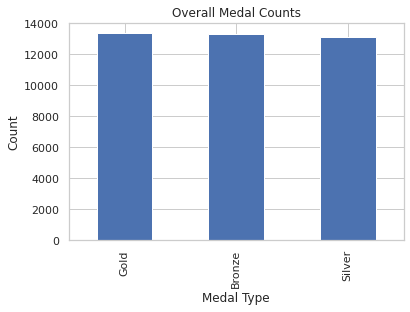

In [19]:
# Overall medal counts
medal_counts = df['Medal'].value_counts()
medal_counts.plot(kind='bar', title="Overall Medal Counts")
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.show()

The overall medal distribution shows that Gold, Silver, and Bronze medals are almost equally distributed among athletes. This indicates a balanced competition where no single medal type overwhelmingly dominates the dataset, giving a fair representation of achievement across all events.


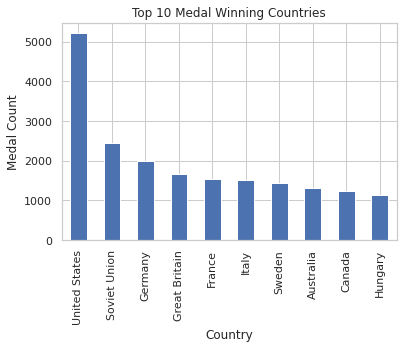

In [20]:
# Top 10 countries by total medals
top_countries = df[df['Medal'].notnull()]['Team'].value_counts().head(10)
top_countries.plot(kind='bar', title="Top 10 Medal Winning Countries")
plt.xlabel("Country")
plt.ylabel("Medal Count")
plt.show()

The top 10 medal-winning countries highlight the dominance of the United States, which has earned over 5000 medals in total. This supports the observation that developed countries often dominate the Olympics. Other countries in the top 10 also show strong performances, while emerging countries are beginning to make their mark.

## Step 6 – Participation Trends Over Time


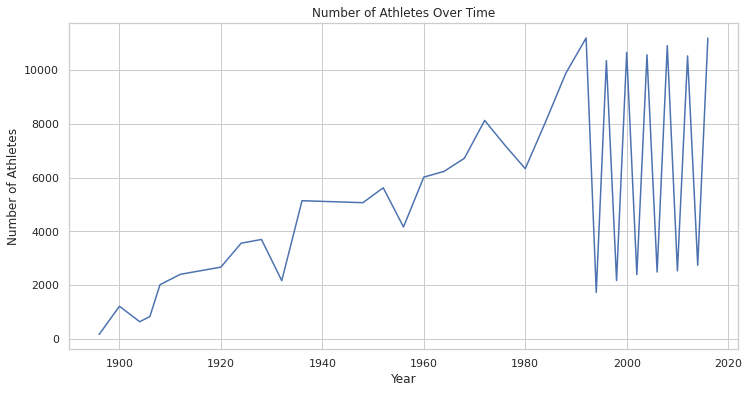

In [21]:
# Number of athletes participating each year
athletes_per_year = df.groupby('Year')['ID'].nunique()
athletes_per_year.plot(kind='line', figsize=(12,6), title="Number of Athletes Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()

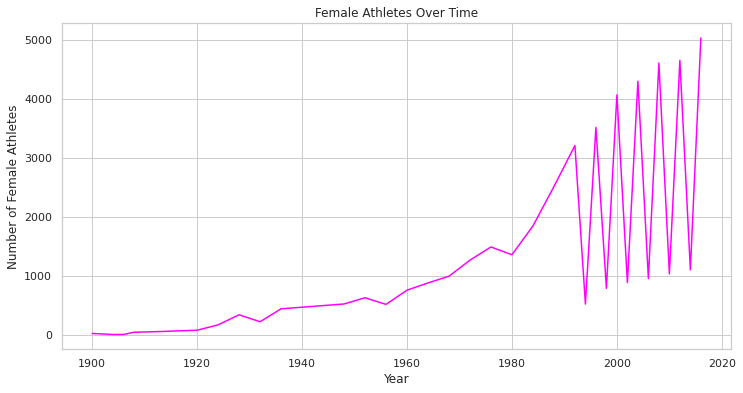

In [22]:
# Optional: Female participation trend over time
female_athletes_per_year = df[df['Sex']=='F'].groupby('Year')['ID'].nunique()
female_athletes_per_year.plot(kind='line', figsize=(12,6), title="Female Athletes Over Time", color='magenta')
plt.xlabel("Year")
plt.ylabel("Number of Female Athletes")
plt.show()

The number of athletes participating in the Olympics gradually increased from the early Games, reaching a peak around the 1990s. After this peak, the trend shows major ups and downs, reflecting the impact of events such as wars, boycotts, and other global disruptions. Female participation shows a similar pattern, with steady growth leading up to the 1990s, followed by fluctuations in later years. These trends illustrate both the historical growth of the Olympics and how external factors have influenced participation over time.

## Step 7 – Sport-specific Insights

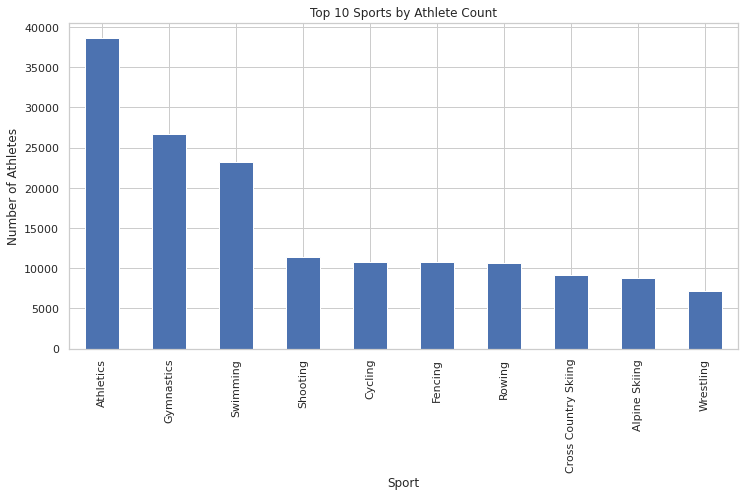

In [23]:
# Top 10 sports by number of athletes
top_sports = df['Sport'].value_counts().head(10)
top_sports.plot(kind='bar', figsize=(12,6), title="Top 10 Sports by Athlete Count")
plt.xlabel("Sport")
plt.ylabel("Number of Athletes")
plt.show()


Analyzing athlete participation by sport reveals the most popular sports in the Olympics. Athletics leads with 38,624 athletes, followed by Gymnastics (26,707) and Swimming (23,195). Other top sports include Shooting (11,448), Cycling (10,827), Fencing (10,735), Rowing (10,595), Cross Country Skiing (9,133), Alpine Skiing (8,829), and Wrestling (7,154). 

## Step 8 – Athlete Physique vs Success in Sports


Average Height and Weight per Sport:
                       Height     Weight
Sport                                   
Basketball         188.578263  82.792769
Volleyball         186.568449  78.568155
Beach Volleyball   185.769504  78.670213
Handball           182.661664  80.461937
Baseball           182.191275  84.881991
Water Polo         182.129225  80.316953
Rowing             181.856442  77.514346
Bobsleigh          179.782865  83.924951
Ice Hockey         178.261240  79.001450
Canoeing           178.189110  75.841355
Swimming           177.941194  70.477086
Tennis             177.781272  70.562893
Sailing            177.460223  74.443274
Modern Pentathlon  177.270125  70.210197
Taekwondo          176.727723  68.020627

Average Height and Weight of Medal-Winning Athletes per Sport:
                       Height     Weight
Sport                                   
Basketball         191.107407  85.455556
Volleyball         186.779154  79.491228
Beach Volleyball   186.166667  79.0972

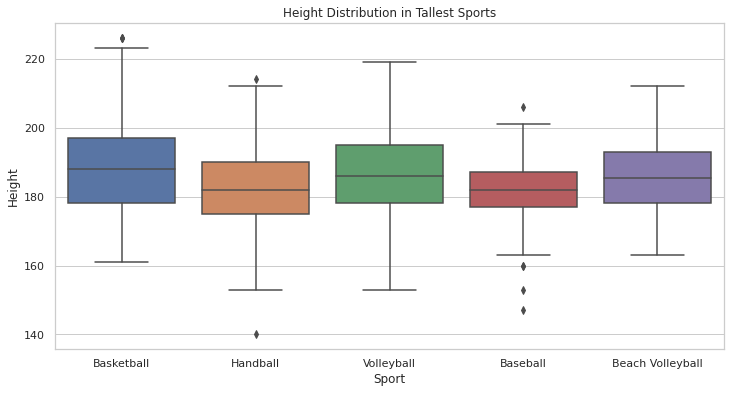

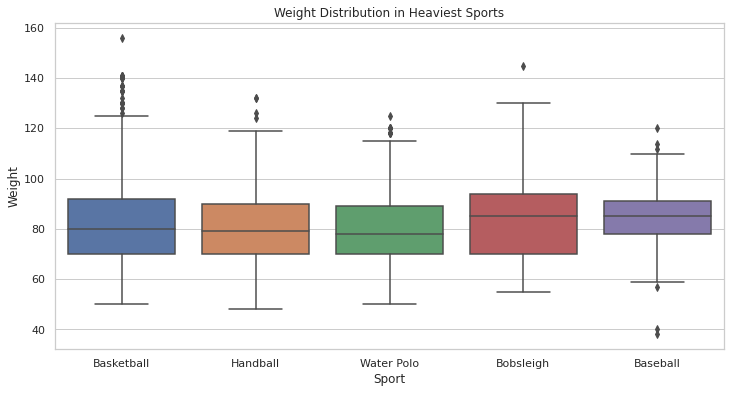

In [25]:
# Average height and weight per sport
sport_physique = df.groupby('Sport')[['Height', 'Weight']].mean().sort_values(by='Height', ascending=False)
print("Average Height and Weight per Sport:")
print(sport_physique.head(15))  # top 15 tallest sports

# Optional: Filter only medal-winning athletes
medal_athletes = df[df['Medal'].notnull()]
medal_physique = medal_athletes.groupby('Sport')[['Height', 'Weight']].mean().sort_values(by='Height', ascending=False)
print("\nAverage Height and Weight of Medal-Winning Athletes per Sport:")
print(medal_physique.head(15))

# Visualize height and weight distribution for selected sports
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 sports by tallest athletes
top_sports_height = sport_physique.head(5).index.tolist()

plt.figure(figsize=(12,6))
sns.boxplot(x='Sport', y='Height', data=df[df['Sport'].isin(top_sports_height)])
plt.title("Height Distribution in Tallest Sports")
plt.show()

# Top 5 sports by heaviest athletes
top_sports_weight = sport_physique.sort_values(by='Weight', ascending=False).head(5).index.tolist()

plt.figure(figsize=(12,6))
sns.boxplot(x='Sport', y='Weight', data=df[df['Sport'].isin(top_sports_weight)])
plt.title("Weight Distribution in Heaviest Sports")
plt.show()


Taller and heavier athletes are more successful in specific sports where size and strength provide an advantage, confirming the hypothesis. Conversely, lighter athletes excel in sports requiring agility and flexibility. This demonstrates that athlete physique significantly influences success depending on the sport.
